In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random
from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA #for cluster analysis
from gensim.models import KeyedVectors #for word embeddings
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 

# from _DRAFT_20200604_functions import * #includes constants and score function
from tqdm import tqdm_notebook #for progress bar

%autosave 5

Autosaving every 5 seconds


# 0. Importing story and template vectors and sums 

In [2]:
templates = pickle.load( open( 'template_vc', "rb" ) )
stories = pickle.load( open( 'actual_story_vc', "rb" ) )

# I. Avg correlation between word vectors of recall and template word vectors
## A. story template x story vector

In [8]:
story_order = ['11','12','13','14','21','22','23','24','31','32','33','34','41','42','43','44']
template_order = [1,2,3,4,10,20,30,40]
tr_cor = np.zeros((8,16))
count = 0

for key in story_order:
    this_story = np.zeros((8, 1))
    count_ii = 0
    for k in template_order:
        this_coef = np.corrcoef(stories[key], templates[k])
        this_story[count_ii] = this_coef[0,1]
        count_ii += 1
    this_story = np.ravel(this_story)
    tr_cor[:, count] = this_story
    count += 1

[Text(0, 0, '1:restaurant'),
 Text(0, 0, '2:airport'),
 Text(0, 0, '3:grocery store'),
 Text(0, 0, '4:lecture hall'),
 Text(0, 0, '10:break up'),
 Text(0, 0, '20: proposal'),
 Text(0, 0, '30:business deal'),
 Text(0, 0, '40:meet cute')]

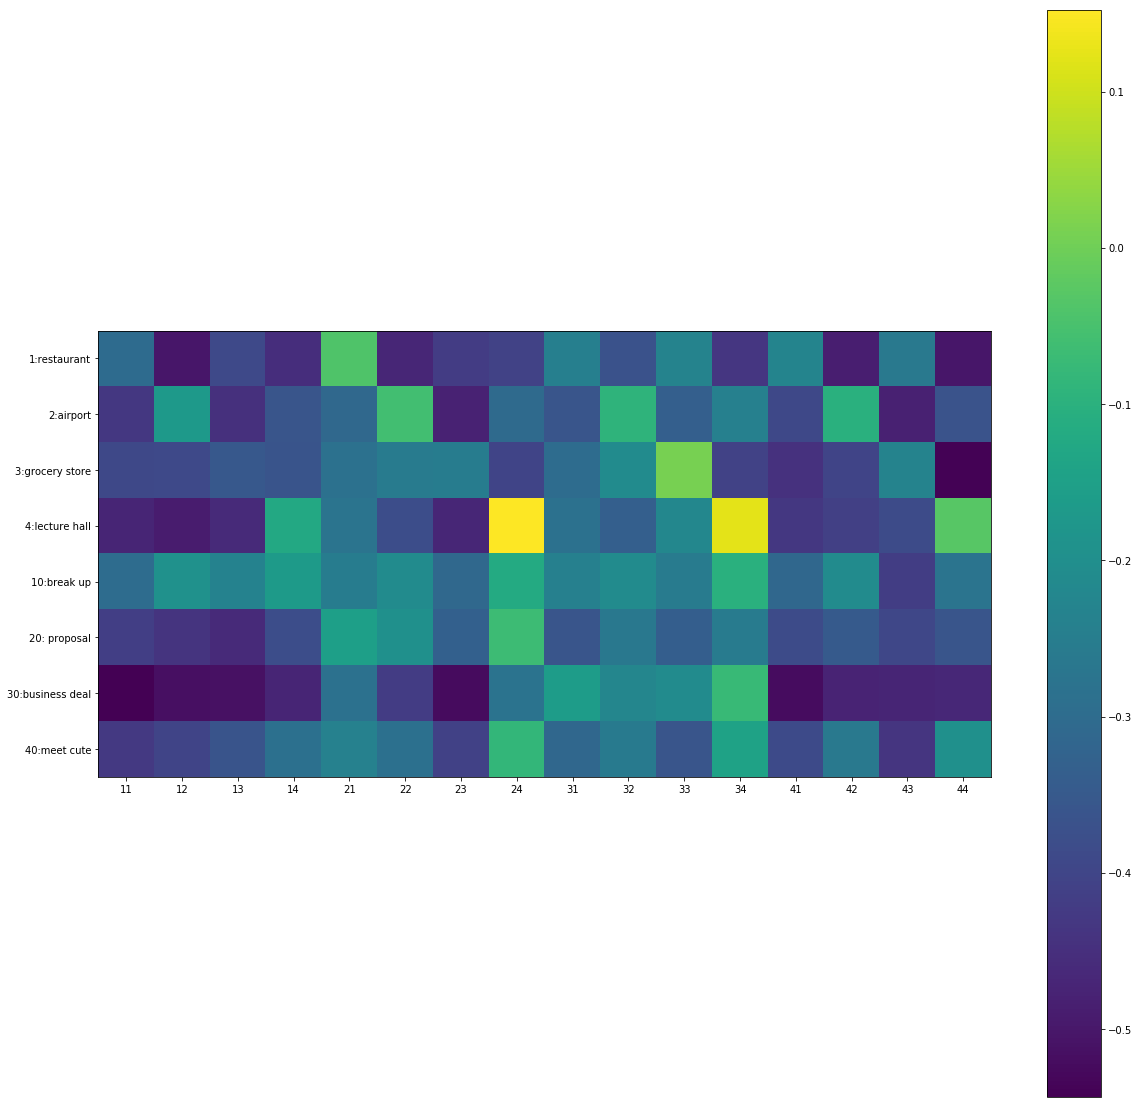

In [9]:
template_label = ['1:restaurant', '2:airport', '3:grocery store', '4:lecture hall', '10:break up', '20: proposal', '30:business deal', '40:meet cute']


fig, ax = plt.subplots(1,1, figsize=(20,20))
im = ax.imshow(tr_cor)

fig.colorbar(im)

# X ticks
ax.set_xticks(np.arange(0,16))
ax.set_xticklabels(story_order)

# Y ticks
ax.set_yticks(np.arange(0,8))
ax.set_yticklabels(template_label)



## C. Normalize each row

[Text(0, 0, '1:restaurant'),
 Text(0, 0, '2:airport'),
 Text(0, 0, '3:grocery store'),
 Text(0, 0, '4:lecture hall'),
 Text(0, 0, '10:break up'),
 Text(0, 0, '20: proposal'),
 Text(0, 0, '30:business deal'),
 Text(0, 0, '40:meet cute')]

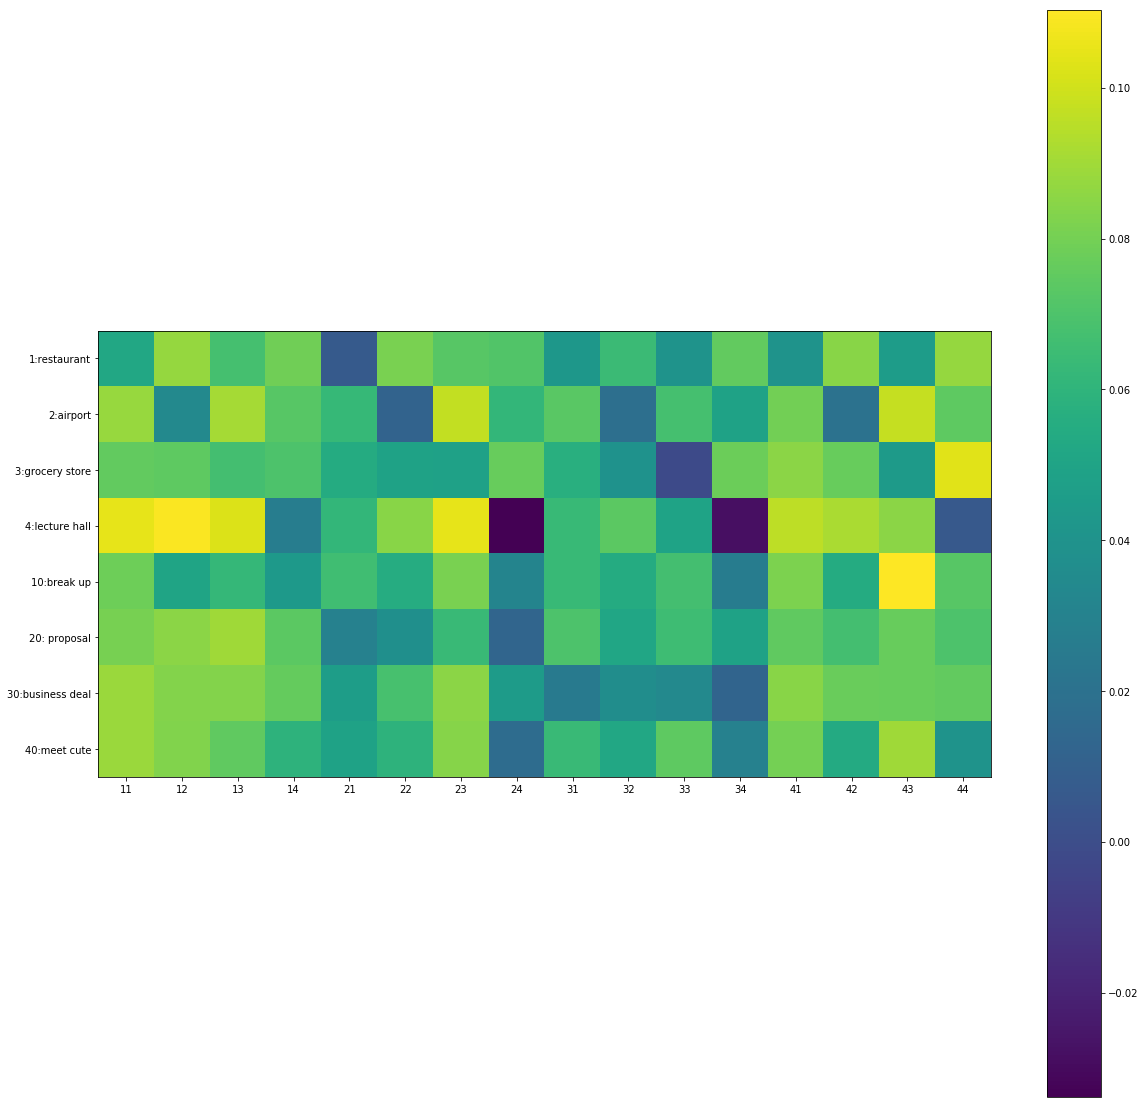

In [10]:
sum_of_rows = tr_cor.sum(axis=1)
normalized_array = tr_cor / sum_of_rows[:, np.newaxis]

fig, ax = plt.subplots(1,1, figsize=(20,20))
im = ax.imshow(normalized_array)

fig.colorbar(im)

# X ticks
ax.set_xticks(np.arange(0,16))
ax.set_xticklabels(story_order)

# Y ticks
ax.set_yticks(np.arange(0,8))
ax.set_yticklabels(template_label)



## C. Normalize each column (not row)

[Text(0, 0, '1:restaurant'),
 Text(0, 0, '2:airport'),
 Text(0, 0, '3:grocery store'),
 Text(0, 0, '4:lecture hall'),
 Text(0, 0, '10:break up'),
 Text(0, 0, '20: proposal'),
 Text(0, 0, '30:business deal'),
 Text(0, 0, '40:meet cute')]

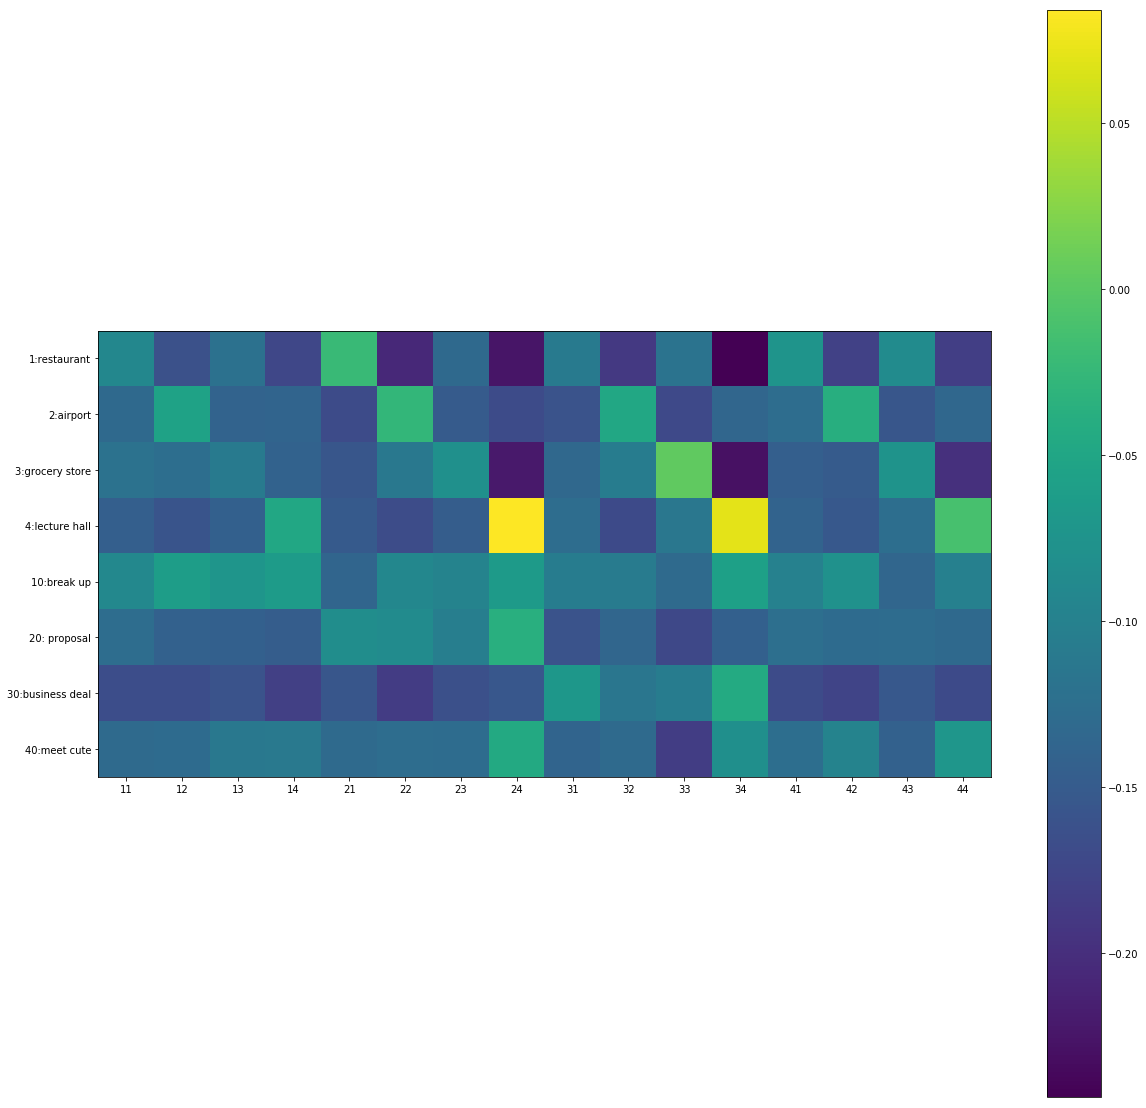

In [11]:
normed_matrix = normalize(tr_cor, axis=0, norm='l1')

fig, ax = plt.subplots(1,1, figsize=(20,20))
im = ax.imshow(normed_matrix)

fig.colorbar(im)

# X ticks
ax.set_xticks(np.arange(0,16))
ax.set_xticklabels(story_order)

# Y ticks
ax.set_yticks(np.arange(0,8))
ax.set_yticklabels(template_label)
